Simple Linear Regression

In [1]:
l=[['Weight','Height'],[45,120],[58,135],[48,123],[29,90],[60,180],[56,171],[48,134],[46,134],[70,160],[60,145],[50,125]]
import csv
with open('height-weight.csv','w') as f:
    writer=csv.writer(f)
    for i in l:
        writer.writerow(i)
   

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df=pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,29,90
4,60,180


Text(0, 0.5, 'Height')

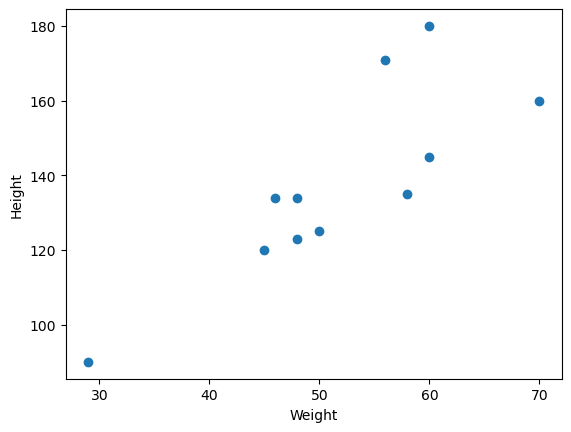

In [6]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [7]:
X=df[['Weight']]
Y=df['Height']

In [7]:
X.shape


(11, 1)

In [14]:
Y.shape

(11,)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

In [10]:
X_train.shape

(8, 1)

In [18]:
X_test

,Weight
5,56
0,45
9,60


In [11]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [12]:
X_train=std.fit_transform(X_train)

In [13]:
X_test=std.transform(X_test)

In [14]:
X_test

array([[ 0.43197554],
       [-0.5427385 ],
       [ 0.78641702]])

In [15]:
#model training

from sklearn.linear_model import LinearRegression

In [16]:
reg=LinearRegression()

In [17]:
reg.fit(X_train,y_train)

LinearRegression()

In [22]:
reg.intercept_

135.125

In [23]:
reg.coef_

array([21.30940898])

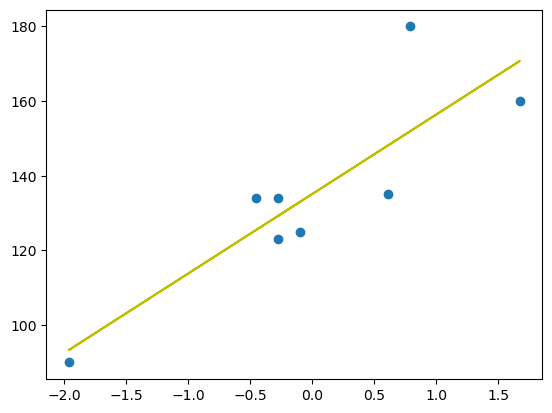

In [27]:
plt.scatter(X_train,y_train)
plt.plot(X_train,reg.predict(X_train),'y')

In [18]:
#prediction for test

y_test_predicted=reg.predict(X_test)

In [19]:
y_test_predicted

array([144.33014354, 123.55956324, 151.88308183])

In [20]:
y_test

5    171
0    120
9    145
Name: Height, dtype: int64

In [1]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

ModuleNotFoundError: No module named 'sklearn'

In [45]:
mse=mean_squared_error(y_test,y_test_predicted)
mae=mean_absolute_error(y_test,y_test_predicted)
print(mse)
print(mae)
print(np.sqrt(MSE))

ValueError: Found input variables with inconsistent numbers of samples: [3, 8]

In [46]:
#accuracy of model r-squared and adjusted r squared

In [23]:
from sklearn.metrics import r2_score

In [24]:
score = r2_score(y_test,y_test_predicted)

In [25]:
from sklearn.datasets import fetch_california_housing

In [26]:
california=fetch_california_housing()

In [27]:
california.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [59]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [61]:
california.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [62]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [28]:
#preparw te datasets
dataset=pd.DataFrame(california.data,columns=california.feature_names)

In [64]:
dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [29]:
dataset['Price']=california.target

In [30]:
dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


<AxesSubplot: >

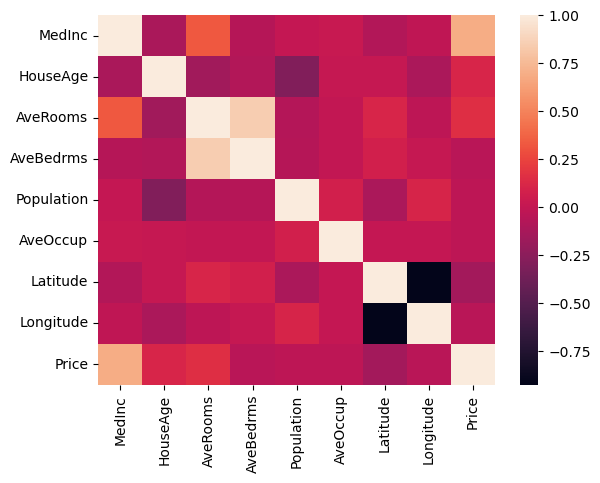

In [31]:
import seaborn as sns 
sns.heatmap(dataset.corr())

In [77]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [32]:
X=dataset.iloc[:,:-1]
Y=dataset.iloc[:,-1]

In [33]:
from sklearn

SyntaxError: invalid syntax (2713175550.py, line 1)

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.33,random_state=10)

In [35]:
X_train.shape

(13828, 8)

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
std=StandardScaler()

X_train=std.fit_transform(X_train)


In [38]:
X_test=std.transform(X_test)

In [39]:
#model training
from sklearn.linear_model import LinearRegression

In [40]:
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [19]:
reg.coef_

array([ 0.82872299,  0.1231163 , -0.27068752,  0.32859106,  0.00213572,
       -0.02810091, -0.93017985, -0.89505497])

In [41]:
y_pred=reg.predict(X_test)

In [42]:
y_pred

array([3.00397485, 2.58011486, 2.3489077 , ..., 3.09003708, 0.79152007,
       2.04477012])

In [43]:
y_test

20303    1.674
16966    3.541
10623    1.602
6146     1.408
2208     1.078
         ...  
13490    1.123
9340     3.020
17439    1.724
2602     0.838
7180     1.417
Name: Price, Length: 6812, dtype: float64

In [44]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print(mse)
print(mae)
print(np.sqrt(mse))

0.5522332399363619
0.537105694300796
0.7431239734636219


In [45]:
import pickle
pickle.dump(std,open('scaler.pkl','wb'))
pickle.dump(reg,open('reg.pkl','wb'))

In [46]:
model_reg=pickle.load(open('reg.pkl','rb'))
model_reg.predict(X_test)

array([3.00397485, 2.58011486, 2.3489077 , ..., 3.09003708, 0.79152007,
       2.04477012])

In [49]:
from sklearn.linear_model import Ridge

In [51]:
rig=Ridge()

In [52]:
rig.fit(X_train,y_train)

Ridge()

In [53]:
import pickle
pickle.dump(rig,open('ridge.pkl','wb'))